<h1><center><b>Neural Network Basic Model</b></center></h1>

## Import and Load Dataset

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [4]:
# Check if the GPU is available for Tensorflow
if tf.test.is_built_with_cuda():
    print("CUDA (GPU) compatible version of Tensorflow is installed")
else:
    print("Warning: No CUDA (GPU) compatible version of Tensorflow found")

num_gpu = len(tf.config.list_physical_devices('GPU'))
print(f"Num GPUs Available: {num_gpu}")
if num_gpu>0:
    print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

CUDA (GPU) compatible version of Tensorflow is installed
Num GPUs Available: 1
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
# Load the preprocessed training and test datasets
train_data = pd.read_csv('dataset_preprocessed/LinearImput_Feature_Scale_Cap_Clean_Train.csv')
test_data = pd.read_csv('dataset_preprocessed/LinearImput_Feature_Scale_Cap_Clean_Test.csv')

In [6]:
# Separate features and target from the training dataset
X_train = train_data.drop(columns=['target'])
Y_train = train_data['target']
X_test = test_data.drop(columns=['target'])
Y_test = test_data['target']

## Create and Train the Model

In [7]:
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.4))  # Regularization

# Hidden layers
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())  # Optional, to improve training stability
model.add(Dropout(0.4))

model.add(Dense(16, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

In [8]:
%tensorboard --logdir {'tf_logs/model_nn_basic'}

In [12]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(Y_train), y=Y_train)
class_weights = dict(enumerate(class_weights))
print(class_weights)

{0: 0.5520552664885389, 1: 5.302588035065444}


In [13]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='tf_logs/model_nn_basic', histogram_freq=1)

#class_weights = {0: 7.11, 1: 0.74}  # Manually Adjust

model.fit(X_train, Y_train, 
          epochs=50, 
          batch_size=32, 
          validation_data=(X_test, Y_test), 
          callbacks=[tensorboard_callback],
          class_weight=class_weights
         )

Epoch 1/20
24536/24536 [==============================] - 207s 8ms/step - loss: 0.0916 - accuracy: 0.9586 - precision: 0.6961 - recall: 0.9947 - val_loss: 0.0960 - val_accuracy: 0.9646 - val_precision: 0.7274 - val_recall: 0.9997
Epoch 2/20
24536/24536 [==============================] - 202s 8ms/step - loss: 0.0762 - accuracy: 0.9652 - precision: 0.7308 - recall: 0.9980 - val_loss: 0.0915 - val_accuracy: 0.9665 - val_precision: 0.7380 - val_recall: 0.9992
Epoch 3/20
24536/24536 [==============================] - 204s 8ms/step - loss: 0.0742 - accuracy: 0.9657 - precision: 0.7338 - recall: 0.9979 - val_loss: 0.0897 - val_accuracy: 0.9673 - val_precision: 0.7430 - val_recall: 0.9981
Epoch 4/20
24536/24536 [==============================] - 208s 8ms/step - loss: 0.0735 - accuracy: 0.9660 - precision: 0.7355 - recall: 0.9979 - val_loss: 0.0951 - val_accuracy: 0.9644 - val_precision: 0.7263 - val_recall: 0.9998
Epoch 5/20
24536/24536 [==============================] - 206s 8ms/step - loss: 

KeyboardInterrupt: 

In [ ]:
#Note: That above output is only for 6 epochs, in reality, we trained the model for 50 epochs (this was just the 2nd run and the 1st output got cleared :( )

In [ ]:
model.save('tf_models/model_nn_basic')

## Teat the model

In [13]:
# Make predictions on the test set
Y_pred_prob = model.predict(X_test)

8179/8179 [==============================] - 11s 1ms/step


In [14]:
Y_pred = (Y_pred_prob > 0.5).astype(int).flatten()

Accuracy: 97.60%

Confusion Matrix:
[[232521   4513]
 [  1770  22908]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.84      0.93      0.88     24678

    accuracy                           0.98    261712
   macro avg       0.91      0.95      0.93    261712
weighted avg       0.98      0.98      0.98    261712



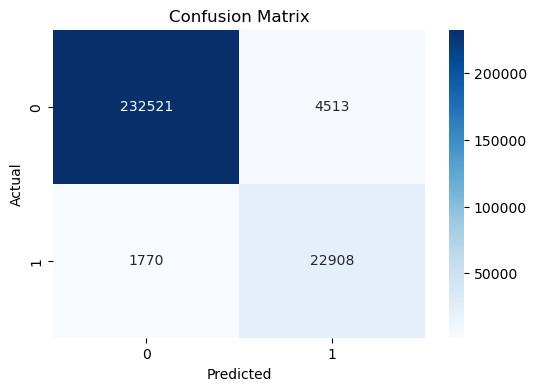

In [15]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

# Visualizing the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Precision, Recall, F1-Score
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

Precision: 0.84
Recall: 0.93
F1-Score: 0.88
ROC-AUC: 0.95
